In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

In [2]:
def LZCompress(katar):
    i, k = 0, 2
    n = len(katar)
    tmparray = []
    tmp = ""
    _tmp=""
    G = nx.DiGraph()
    
    while True:
        if i >= n:
            if tmp:
                tmparray.append(tmp)
                G.add_edge(_tmp,tmp)
            break
        if katar[i] is tmp:
            tmp = tmp + katar[i]
            i += 1
            continue
        tmp = tmp + katar[i]
        if not tmp in tmparray:
            tmparray.append(tmp)
            if _tmp:
                G.add_edge(_tmp,tmp)
            _tmp=tmp
            tmp = katar[i]
        i += 1
    return tmparray,G

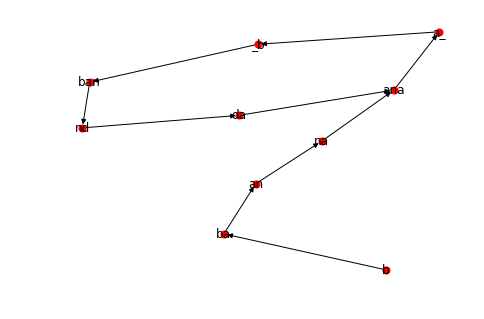

In [3]:
cc,z=LZCompress("banana_bandana")
nx.draw(z, with_labels=True,node_size=50)

In [4]:
dnaHomoSapiens="GACCTATATTGCCGCTGATGAAGCGACAAAACAGGCGATGGTGGAAGTGGTCTATGGCCGCTCCCTCTATGCCGGGGCGGCTCACGGGCCGTCGCCTACCGGTAATCCCAGGGCATTGATCATTGGCAGCCNNNNNNNNNNNNGNTGGACAGGGTTACGGGCGATATCCAGCACGGCGTCGGTAAAGGCGTTGCAGGCGGTGGAGCATCGTGGCGTCGATAGCAACTGGCTGGCCGTTCTTGTCAGCGTGGTCGCGCTGACTATCCTGGGCATTACTCTGCTGGTTTCTTTATTTGCGTCATTAACGGCTTTAAAGCCATCCAGATCCATAAACAGTAGCGCGAAAGACGTGCCTTCCCGATTCGCTTTGCTGATGGCCTGTTCCAGACGATCCT"

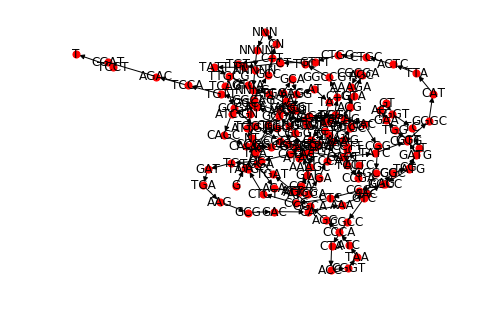

In [5]:
xx,FF = LZCompress(dnaHomoSapiens)
nx.draw(FF, with_labels=True,node_size=50)

In [6]:
dnaHomoSapiens="GACCTATATTGCCGCTGATGAAGCGACAAAACAGGCGATGGTGGAAGTGGTCTATGGCCGCTCCCTCTATGCCGGGGCGGCTCACGGGCCGTCGCCTACCGGTAATCCCAGGGCATTGATCATTGGCAGCCNNNNNNNNNNNNGNTGGACAGGGTTACGGGCGATATCCAGCACGGCGTCGGTAAAGGCGTTGCAGGCGGTGGAGCATCGTGGCGTCGATAGCAACTGGCTGGCCGTTCTTGTCAGCGTGGTCGCGCTGACTATCCTGGGCATTACTCTGCTGGTTTCTTTATTTGCGTCATTAACGGCTTTAAAGCCATCCAGATCCATAAACAGTAGCGCGAAAGACGTGCCTTCCCGATTCGCTTTGCTGATGGCCTGTTCCAGACGATCCT"
control="AAGGGAGGIIIIIIIIIIIGGIIIIIIIIIGIIIIIIGIIIIIIIIIIIGIGIGIIIIIIIIIIIIIIIIIIIIGIIIIIGIIIIIIGGGIGIIGIIIIIIAGAGGIIIIIIIIGIIIGIGIIIIIIIIII############<#<<GGIGIGIIIIIIIIIIGIIIIIIIGIGGGIIIIIIIIGIIIIIIIIIIIIGIIGIGGIIGGIGGIIGGGGGGGGAGGGGGGGGGGGGGGIIIGGGIIGGIGGAGIGGGI<GGGIGGGGGIGIGGAGGGIAGIGGIGGGIIIGGGGGGI<GAGAGGGIIIIIIIIIGGG.GGGGIGGIGGGGIIIGGIIGGGGIIGGIIGGIIGGGGGGIIGGIIIGGIGIIIIIGAGGGGGGGGGGGGGGIIIGGGGG"

In [24]:
xx,FF = LZCompress(dnaHomoSapiens)

maxLenght=len(max(xx, key = len))
d={}

In [25]:
for i,c in enumerate(control):    
    if i == 0:
        continue
    item=ord(control[i])
    itemBefore=ord(control[i-1])
    if item<=itemBefore:
        continue
    for j in range(maxLenght):
        if i-j>0:
            s=dnaHomoSapiens[i-j:i]
            if s in xx:
                if s not in d:
                    d[s] = 1
                else:
                    d[s] +=1

In [26]:
dd=[]
for i,c in enumerate(control):    
    if i == 0:
        continue
    item=ord(control[i])
    itemBefore=ord(control[i-1])
    if item <= itemBefore:
        continue
    for j in range(maxLenght):
        if i-j>0:
            s=dnaHomoSapiens[i-j:i]
            if len(s)>1 and  s in xx:
                dd.append({"str":s,"val":control[i-1]+control[i],
                           "valInt":item-itemBefore})

In [27]:
maxLenght

6

In [51]:
df=pd.DataFrame(dd)
df.head()

,str,val,valInt
0,TA,AG,6
1,CTA,AG,6
2,TA,GI,2
3,ATA,GI,2
4,GA,GI,2


In [56]:
df["strlen"]=df["str"].str.len()

In [57]:
df.head()

,str,val,valInt,strlen
0,TA,AG,6,2
1,CTA,AG,6,3
2,TA,GI,2,2
3,ATA,GI,2,3
4,GA,GI,2,2


[Text(0, 0, 'CTA'),
 Text(0, 0, 'ATA'),
 Text(0, 0, 'TGA'),
 Text(0, 0, 'AAA'),
 Text(0, 0, 'CGA'),
 Text(0, 0, 'GCGA'),
 Text(0, 0, 'TGG'),
 Text(0, 0, 'GTC'),
 Text(0, 0, 'TGGTC'),
 Text(0, 0, 'CGG'),
 Text(0, 0, 'CCGG'),
 Text(0, 0, 'GGC'),
 Text(0, 0, 'GCC'),
 Text(0, 0, 'GGCC'),
 Text(0, 0, 'CGC'),
 Text(0, 0, 'GTA'),
 Text(0, 0, 'GGTA'),
 Text(0, 0, 'GCA'),
 Text(0, 0, 'GGCA'),
 Text(0, 0, 'ATC'),
 Text(0, 0, 'NNN'),
 Text(0, 0, 'NNNN'),
 Text(0, 0, 'NNNNN'),
 Text(0, 0, 'TGGA'),
 Text(0, 0, 'ACA'),
 Text(0, 0, 'AGG'),
 Text(0, 0, 'CAGG'),
 Text(0, 0, 'AGC'),
 Text(0, 0, 'CAGC'),
 Text(0, 0, 'TAA'),
 Text(0, 0, 'GGT'),
 Text(0, 0, 'CGGT'),
 Text(0, 0, 'GCGGT'),
 Text(0, 0, 'CAT'),
 Text(0, 0, 'ATAG'),
 Text(0, 0, 'CCG'),
 Text(0, 0, 'GGCCG'),
 Text(0, 0, 'TTG'),
 Text(0, 0, 'CAG'),
 Text(0, 0, 'TCAG'),
 Text(0, 0, 'GTG'),
 Text(0, 0, 'GCTGA'),
 Text(0, 0, 'TCC'),
 Text(0, 0, 'ATCC'),
 Text(0, 0, 'CTG'),
 Text(0, 0, 'CCTG'),
 Text(0, 0, 'TTA'),
 Text(0, 0, 'ATTA'),
 Text(0, 0, 'AC

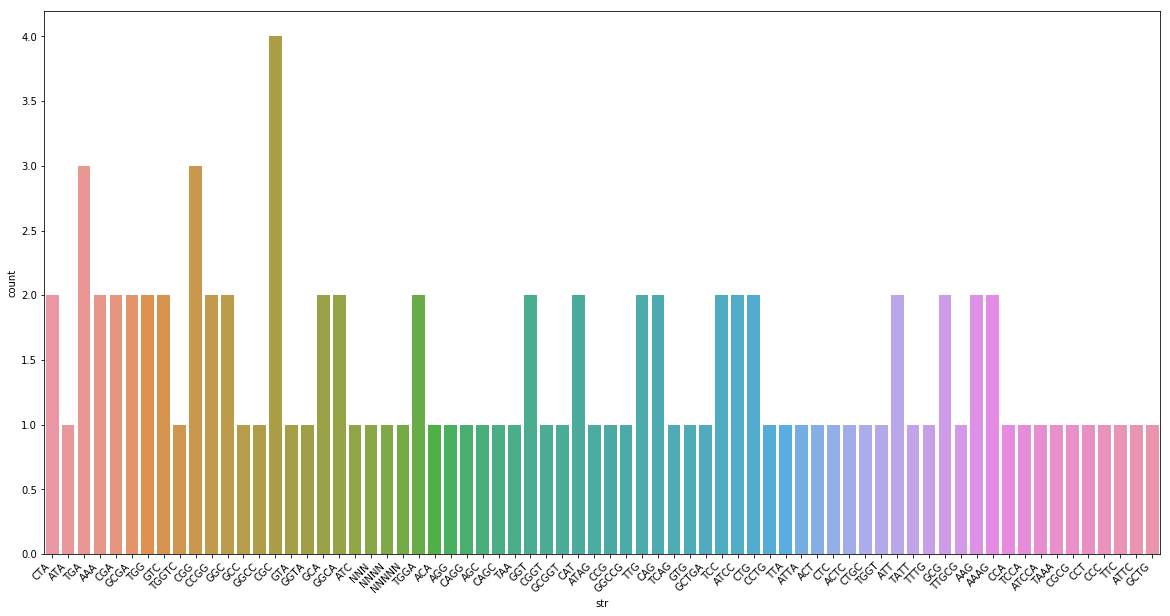

In [69]:
sc=df[df["strlen"]>2]
#sc=sc["str"].value_counts()
plt.figure(figsize=(20,10))
chart = sns.countplot(sc["str"])
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, horizontalalignment='right')

In [70]:
sc=sc["str"].value_counts()[sc["str"].value_counts()>1]

In [74]:
sc

CGC     4
CGG     3
TGA     3
CGA     2
TGG     2
AAAG    2
AAA     2
GCGA    2
ATT     2
GGCA    2
TCC     2
AAG     2
CTG     2
GCA     2
GCG     2
GGT     2
GTC     2
ATCC    2
TGGA    2
CAT     2
TTG     2
GGC     2
CTA     2
CCGG    2
CAG     2
Name: str, dtype: int64

[Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')]

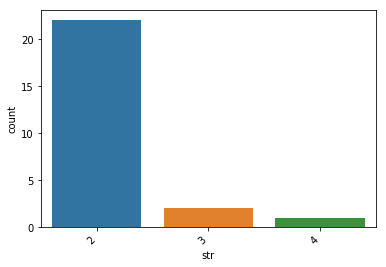

In [72]:
chart = sns.countplot(sc)
chart.set_xticklabels(chart.get_xticklabels(), 
                      rotation=45, horizontalalignment='right')

In [29]:
from operator import itemgetter

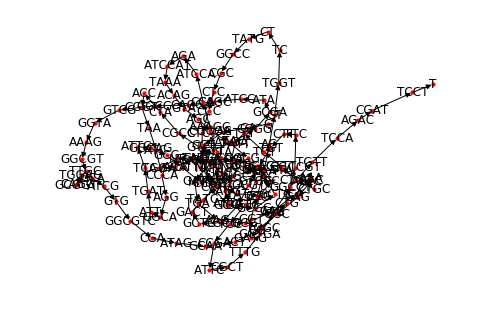

In [30]:
nx.draw(FF, with_labels=True,node_size=10)

In [32]:
for v in FF:
    print(f"{v:4} {FF.degree(v):6}")

G         1
GA        2
AC        2
CCT       2
TA        2
AT        2
TAT       2
TTG       2
GC        2
CCG       2
GCT       2
TG        2
GAT       2
TGA       2
AAG       2
GCG       2
GAC       2
CA        2
AAA       2
AAC       2
CAG       2
GGC       2
CG        2
GATG      2
GGT       2
TGG       2
GAA       2
AG        2
GT        2
TGGT      2
TC        2
CT        2
TATG      2
GGCC      2
CGC       2
CTC       2
CCC       2
CTCT      2
TATGC      2
CCGG      2
GGG       2
GCGG      2
GCTC      2
CAC       2
CGG       2
GGCCG      2
GTC       2
CGCC      2
CTA       2
ACC       2
CGGT      2
TAA       2
ATC       2
CCCA      2
AGG       2
GGCA      2
ATT       2
TGAT      2
TCA       2
ATTG      2
GGCAG      2
GCC       2
CN        2
NNN       2
NNNN      2
NNNNN      2
NNNG      2
GN        2
NT        2
TGGA      2
ACA       2
AGGG      2
GTT       2
TAC       2
CGGG      2
GCGA      2
ATA       2
ATCC      2
CAGC      2
CACG      2
GGCG      2
GTCG      2
GGTA      2


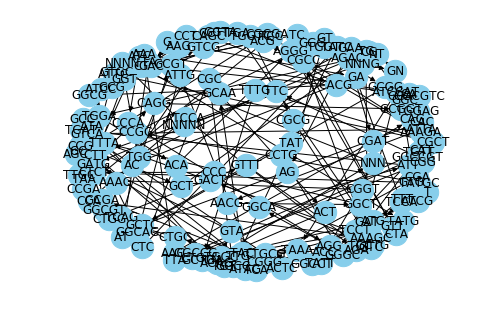

In [33]:
pos = nx.spring_layout(FF, k = 0.9) # k regulates the distance between nodes
nx.draw(FF, with_labels=True, node_color='skyblue', 
        node_size=500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [34]:
from wordcloud import WordCloud

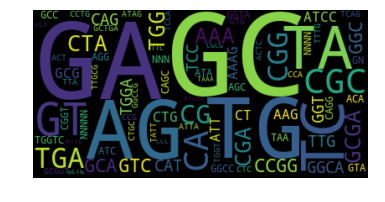

In [35]:
text = " ".join(review for review in df["str"])
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
file = "sampled.all"
with open(file,"r") as f:
    
    print(f.readline())

@SRR290757.869701 A80549ABXX:7:2:13911:133707 length=200

